In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [2]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [6]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [7]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [8]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [9]:
movies.shape

(10329, 3)

In [10]:
ratings.shape

(105339, 4)

In [41]:
data = pd.merge(left= movies, right= ratings, on='movieId')
data.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286


In [12]:
data.shape

(105339, 6)

In [13]:
data.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

In [14]:
data['movieId'].nunique()

10325

In [15]:
data['userId'].nunique()

668

In [16]:
year = []
for title in data['title']:
    year_sub = title[-5:-1]
    try: year.append(int(year_sub))
    except:year.append(9999)
data['moviePubYear'] = year
data['moviePubYear']

0         1995
1         1995
2         1995
3         1995
4         1995
          ... 
105334    2015
105335    2015
105336    2015
105337    2015
105338    2015
Name: moviePubYear, Length: 105339, dtype: int64

In [17]:
print(len(data[data['moviePubYear']==9999]))

2


In [18]:
print(len(data[data['moviePubYear']!=9999]))

105337


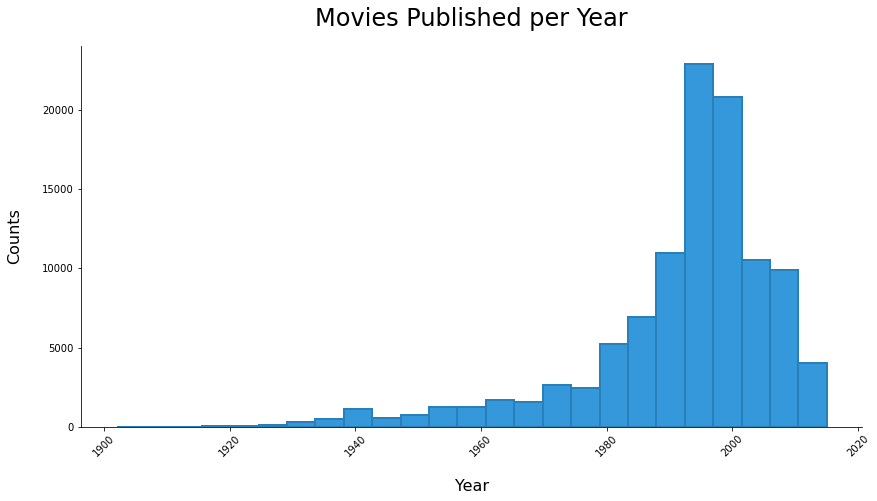

In [19]:
def make_histogram(dataset, attribute, bins=25, bar_color = '#3498db', edge_color='#2980b9', title='title', xlab='X', ylab='Y',sort_index=False):
    if attribute == 'moviePubYear':
        dataset = dataset[dataset['moviePubYear']!=9999]
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'moviePubYear', title='Movies Published per Year', xlab='Year', ylab='Counts')    

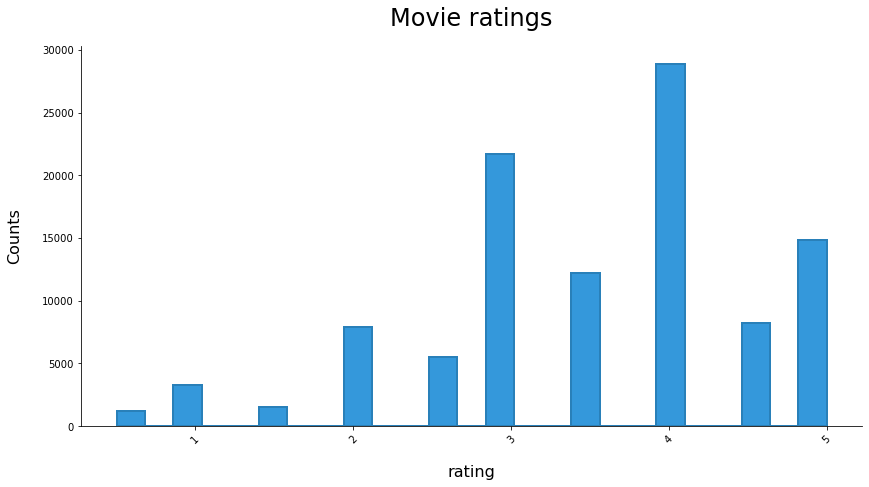

In [20]:
def make_histogram(dataset, attribute, bins=25, bar_color = '#3498db', edge_color='#2980b9', title='title', xlab='X', ylab='Y',sort_index=False):
    if attribute == 'rating':
        dataset = dataset[dataset['moviePubYear']!=9999]
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(data, 'rating', title='Movie ratings', xlab='rating', ylab='Counts')    

In [21]:
genre_df = pd.DataFrame(data['genres'].str.split('|').tolist(), index=data['movieId']).stack()
genre_df = genre_df.reset_index([0, 'movieId'])
genre_df.columns = ['movieId', 'Genre' ]

In [22]:
genre_df

,movieId,Genre
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy
...,...,...
281899,148238,Comedy
281900,148626,Drama
281901,148626,Drama
281902,148626,Drama


In [23]:
import seaborn as sns

<AxesSubplot:xlabel='count', ylabel='Genre'>

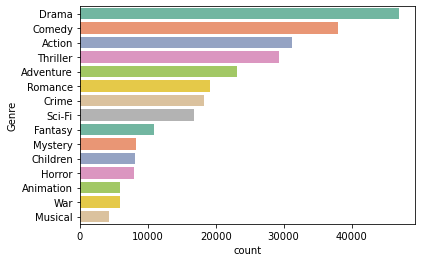

In [98]:
sns.countplot(y='Genre', data=genre_df, palette='Set2', order=genre_df['Genre'].value_counts().index[0:15])

In [25]:
genre_df['Genre'].nunique()

20

In [26]:
from collections import defaultdict
values = defaultdict(list)
for ind, row in data.iterrows():
    for genre in row['genres'].split('|'):
        values[genre].append(row['rating'])
genre_lst, rating_lst = [], []
for key, item in values.items():
    if key not in [0,1]:
        genre_lst.append(key)
        rating_lst.append(np.mean(item))
genres_with_ratings = pd.DataFrame([genre_lst, rating_lst]).T
genres_with_ratings.columns = ['Genre','mean_rating']

In [27]:
genres_with_ratings

,Genre,mean_rating
0,Adventure,3.518027
1,Animation,3.63535
2,Children,3.439429
3,Comedy,3.420996
4,Fantasy,3.500459
5,Romance,3.544255
6,Drama,3.650266
7,Action,3.45145
8,Crime,3.642392
9,Thriller,3.495561


<AxesSubplot:xlabel='mean_rating', ylabel='Genre'>

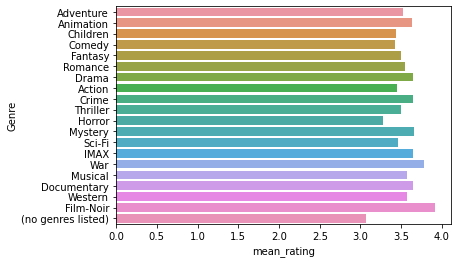

In [105]:
sns.barplot(x='mean_rating', y='Genre', data = genres_with_ratings, orient='h')

In [102]:
genre= 'comedy'
data.title

0                            Toy Story (1995)
1                            Toy Story (1995)
2                            Toy Story (1995)
3                            Toy Story (1995)
4                            Toy Story (1995)
                         ...                 
105334         A Very Murray Christmas (2015)
105335                   The Big Short (2015)
105336                   The Big Short (2015)
105337                   The Big Short (2015)
105338    Marco Polo: One Hundred Eyes (2015)
Name: title, Length: 105339, dtype: object

In [30]:
num_ratings = pd.DataFrame(data.groupby('movieId').count()['rating']).reset_index()
data = pd.merge(left=data, right=num_ratings, on='movieId')
data.rename(columns={'rating_x': 'rating', 'rating_y': 'numRatings'}, inplace=True)

In [31]:
data.sort_values(by='numRatings', ascending=False).drop_duplicates('movieId')[:10]

,movieId,title,genres,userId,rating,timestamp,moviePubYear,numRatings
8815,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,223,5.0,948941040,1994,325
11163,356,Forrest Gump (1994),Comedy|Drama|Romance|War,196,5.0,834707483,1994,311
9624,318,"Shawshank Redemption, The (1994)",Crime|Drama,70,5.0,1252701714,1994,308
14740,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,431,4.0,839893514,1993,294
18515,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,318,3.0,842517264,1991,290
7582,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,50,3.0,905249982,1977,273
53498,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,277,4.0,1445249840,1999,261
17810,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,278,4.0,1341360389,1991,253
3958,110,Braveheart (1995),Action|Drama|War,451,4.0,1130836510,1995,248
15875,527,Schindler's List (1993),Drama|War,7,2.5,1322058520,1993,248


In [47]:
data1 = data.groupby(['genres','title']).agg({'rating': ['mean','count']})
data1

rating      
                                                         mean count
genres             title                                           
(no genres listed) Li'l Quinquin (    )                  2.00     1
                   Marco Polo: One Hundred Eyes (2015)   4.00     1
                   Pablo (2012)                          3.50     1
                   Round Trip to Heaven (1992)           4.00     1
                   The 50 Year Argument (2014)           2.50     1
...                                                       ...   ...
Western            Viva Zapata! (1952)                   3.50     2
                   Westerner, The (1940)                 3.00     1
                   Wild Bill (1995)                      3.00     1
                   Winchester '73 (1950)                 4.25     2
                   Wyatt Earp (1994)                     3.20    30

[10325 rows x 2 columns]

In [53]:
data1.rating['mean']

genres              title                              
(no genres listed)  Li'l Quinquin (    )                   2.00
                    Marco Polo: One Hundred Eyes (2015)    4.00
                    Pablo (2012)                           3.50
                    Round Trip to Heaven (1992)            4.00
                    The 50 Year Argument (2014)            2.50
                                                           ... 
Western             Viva Zapata! (1952)                    3.50
                    Westerner, The (1940)                  3.00
                    Wild Bill (1995)                       3.00
                    Winchester '73 (1950)                  4.25
                    Wyatt Earp (1994)                      3.20
Name: mean, Length: 10325, dtype: float64

# content based recommendations


In [79]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [81]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])

In [87]:
movie_user = data.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 (1979),...,[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),a/k/a Tommy Chong (2005),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [83]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [85]:
recommendations('Toy Story (1995)').head()

1815                                       Antz (1998)
2496                                Toy Story 2 (1999)
2967    Adventures of Rocky and Bullwinkle, The (2000)
3166                  Emperor's New Groove, The (2000)
3811                             Monsters, Inc. (2001)
Name: title, dtype: object

# collaborative based recommender system

In [88]:
ratings = pd.merge(movies,ratings).drop(['genres','timestamp'],axis=1)
print(ratings.shape)
ratings.head()

(105339, 4)


,movieId,title,userId,rating
0,1,Toy Story (1995),2,5.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),8,5.0
3,1,Toy Story (1995),11,4.0
4,1,Toy Story (1995),14,4.0


In [89]:
userRatings = ratings.pivot_table(index=['userId'],columns=['title'],values='rating')
userRatings.head()
print("Before: ",userRatings.shape)
userRatings = userRatings.dropna(thresh=10, axis=1).fillna(0,axis=1)
#userRatings.fillna(0, inplace=True)
print("After: ",userRatings.shape)

Before:  (668, 10323)
After:  (668, 2315)


In [90]:
corrMatrix = userRatings.corr(method='pearson')
corrMatrix.head(100)

title,"'burbs, The (1989)",(500) Days of Summer (2009),*batteries not included (1987),...And Justice for All (1979),10 Things I Hate About You (1999),"10,000 BC (2008)",101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),12 Angry Men (1957),127 Hours (2010),...,Young Guns II (1990),Young Sherlock Holmes (1985),Zack and Miri Make a Porno (2008),Zero Effect (1998),Zodiac (2007),Zombieland (2009),Zoolander (2001),eXistenZ (1999),xXx (2002),¡Three Amigos! (1986)
title,,,,,,,,,,,,,,,,,,,,,
"'burbs, The (1989)",1.000000,-0.006918,0.215640,0.082411,0.114110,0.049633,0.099504,0.138190,0.133915,0.058505,...,0.026595,0.043570,0.159243,0.006989,0.094661,0.173071,0.081404,0.185659,0.077304,0.128605
(500) Days of Summer (2009),-0.006918,1.000000,0.020652,0.063079,0.160915,0.191607,0.044498,0.091379,0.087441,0.313089,...,-0.029614,-0.032551,0.305797,0.015281,0.346972,0.331373,0.264087,0.097257,0.201568,0.039446
*batteries not included (1987),0.215640,0.020652,1.000000,-0.015380,0.145954,0.092240,0.033886,0.099740,0.059944,-0.018325,...,0.125969,-0.017519,0.066173,0.122175,0.025189,0.055981,0.011039,0.086341,-0.022285,0.112441
...And Justice for All (1979),0.082411,0.063079,-0.015380,1.000000,0.081823,-0.014657,0.082126,0.100247,0.169133,0.043585,...,0.045524,0.185051,0.074082,0.186946,0.215165,0.039779,0.139236,0.054715,0.197637,0.110787
10 Things I Hate About You (1999),0.114110,0.160915,0.145954,0.081823,1.000000,0.110462,0.085477,0.274698,0.072888,0.153373,...,0.141131,0.065374,0.216029,0.092914,0.222277,0.120245,0.213239,0.226379,0.104678,0.133899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
All About Eve (1950),0.010909,0.037337,-0.025440,0.022974,-0.006037,-0.024244,0.076269,0.116205,0.344649,0.077061,...,-0.025465,0.025728,0.007261,0.141101,-0.010885,-0.003710,-0.001890,0.015455,0.005715,-0.019649
All About My Mother (Todo sobre mi madre) (1999),-0.025546,-0.010538,-0.018965,0.124994,0.059693,-0.018073,0.107064,0.033063,0.123700,0.034324,...,0.101367,0.136426,0.025106,0.135728,0.062490,0.015355,0.020210,0.145394,0.064960,0.072440
All Dogs Go to Heaven 2 (1996),0.010645,-0.030963,-0.016664,0.024536,0.022353,-0.015881,0.282931,0.064816,-0.022320,-0.019179,...,-0.016681,-0.018336,-0.018857,-0.018278,-0.026593,-0.035242,-0.030846,-0.018755,-0.023323,-0.031098


In [91]:
def get_similar(movie_name,rating):
    similar_ratings = corrMatrix[movie_name]*(rating-2.5)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    #print(type(similar_ratings))
    return similar_ratings

In [92]:
romantic_lover = [("(500) Days of Summer (2009)",5),("Alice in Wonderland (2010)",3),("Aliens (1986)",1),("2001: A Space Odyssey (1968)",2)]
similar_movies = pd.DataFrame()
for movie,rating in romantic_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)

C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1004585255.py:4: FutureWarning: The frame.append method is deprecated and will be remo

title,(500) Days of Summer (2009),Scott Pilgrim vs. the World (2010),Up in the Air (2009),"Social Network, The (2010)",Forgetting Sarah Marshall (2008),"I Love You, Man (2009)",Shutter Island (2010),Knocked Up (2007),Juno (2007),Black Swan (2010),...,City Slickers II: The Legend of Curly's Gold (1994),Adventures in Babysitting (1987),Down Periscope (1996),In the Line of Fire (1993),"Net, The (1995)",Mr. Holland's Opus (1995),Legends of the Fall (1994),Leaving Las Vegas (1995),Sense and Sensibility (1995),Dead Man Walking (1995)
0,2.500000,1.202222,1.189479,1.182038,1.128160,1.112056,1.087092,1.080662,1.066399,1.026431,...,-0.119706,-0.123165,-0.124409,-0.125532,-0.125619,-0.137008,-0.138929,-0.152469,-0.161686,-0.201585
1,0.050642,0.095478,0.055269,0.100211,0.120590,0.137748,0.126004,0.115056,0.069548,0.080289,...,0.026892,0.020657,-0.012767,-0.000147,0.019334,-0.001519,-0.013393,0.001711,0.000719,0.003869
2,-0.097138,-0.207422,-0.125378,-0.159138,-0.132907,-0.195366,-0.200302,-0.214118,-0.208352,-0.130263,...,0.008809,-0.337227,0.029333,-0.387938,-0.130052,0.075382,-0.104231,-0.168279,-0.022725,-0.185561
3,-0.003642,-0.027816,-0.029554,-0.037658,-0.032698,-0.047473,-0.011734,-0.059844,-0.041890,-0.016443,...,-0.008833,-0.098290,0.007319,-0.077258,-0.029263,-0.013268,-0.037807,-0.068459,-0.029630,-0.072516


In [93]:
similar_movies.sum().sort_values(ascending=False).head(20)

title
(500) Days of Summer (2009)                      2.449862
Up in the Air (2009)                             1.089816
Social Network, The (2010)                       1.085453
Forgetting Sarah Marshall (2008)                 1.083143
Curious Case of Benjamin Button, The (2008)      1.082106
Scott Pilgrim vs. the World (2010)               1.062462
I Love You, Man (2009)                           1.006965
Shutter Island (2010)                            1.001060
Inception (2010)                                 0.994590
Black Swan (2010)                                0.960014
Crazy, Stupid, Love. (2011)                      0.950626
Notebook, The (2004)                             0.949289
Slumdog Millionaire (2008)                       0.946595
50/50 (2011)                                     0.941807
Knocked Up (2007)                                0.921756
Inglourious Basterds (2009)                      0.919089
Yes Man (2008)                                   0.905043
Harry Po

In [96]:
action_lover = [("Amazing Spider-Man, The (2012)",5),("Mission: Impossible III (2006)",4),("Toy Story 3 (2010)",2),("2 Fast 2 Furious (Fast and the Furious 2, The) (2003)",4)]
similar_movies = pd.DataFrame()
for movie,rating in action_lover:
    similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)

similar_movies.head(10)
similar_movies.sum().sort_values(ascending=False).head(20)

C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1191409001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1191409001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1191409001.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  similar_movies = similar_movies.append(get_similar(movie,rating),ignore_index = True)
C:\Users\07shr\AppData\Local\Temp\ipykernel_13876\1191409001.py:4: FutureWarning: The frame.append method is deprecated and will be remo

title
Amazing Spider-Man, The (2012)                                                 3.027352
2 Fast 2 Furious (Fast and the Furious 2, The) (2003)                          2.542994
X-Men Origins: Wolverine (2009)                                                2.400846
Spider-Man 3 (2007)                                                            2.345450
Constantine (2005)                                                             2.314407
Chronicles of Riddick, The (2004)                                              2.278493
Iron Man 2 (2010)                                                              2.225523
Hellboy II: The Golden Army (2008)                                             2.175344
Mission: Impossible III (2006)                                                 2.174263
Salt (2010)                                                                    2.165038
Hellboy (2004)                                                                 2.150340
xXx (2002)                